# Alberi di Decisione

gli alberi sono di due tipi:
* **di classificazione** per le variabili categoriche
* **di regressione** per le variabili quantitative

## Alberi di classificazione 

i metodi per dividere i sottogruppi utilizzati nei nodi:
* Indice di gini
* Entropia: misura dell'incertezza dei dati
* Chi-quadrato
* Guadagno di informazione: individuare l'attributo chè ha il guadagno di informazione maggiore


le **Tecniche di pruning** permette di tagliare alcuni rami degli alberi di decisione:
* pre-pruning
* post-pruning

gli algoritmi per creare gli alberi di decisione sono:
* CHAID
* ID3
* QUEST
* C4.5
* C5.0

è molto importante fissare una **regola di arresto** per lo split dell'albero

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Titanic=pd.read_csv("https://raw.githubusercontent.com/ettore1461/My-Introduction-to-Statistical-Learning/master/Dataset/titanic/train.csv")

In [4]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
Titanic.Sex=Titanic.Sex.map({"male":1,"female":0})

ho eseguito una rimappatura della variabile sesso, trasformandola in una variabile numerica

In [7]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [8]:
dtc=DecisionTreeClassifier()

In [9]:
train=Titanic[["Pclass","Sex","Age","Survived"]]
train.dropna(inplace=True)

X=train[["Pclass","Sex","Age"]]
Y=train["Survived"]

dtc.fit(X,Y)

/home/ettore1461/anaconda3/envs/sheep/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
from sklearn import tree
import pydotplus
from IPython.display import Image

features=list(X.columns)

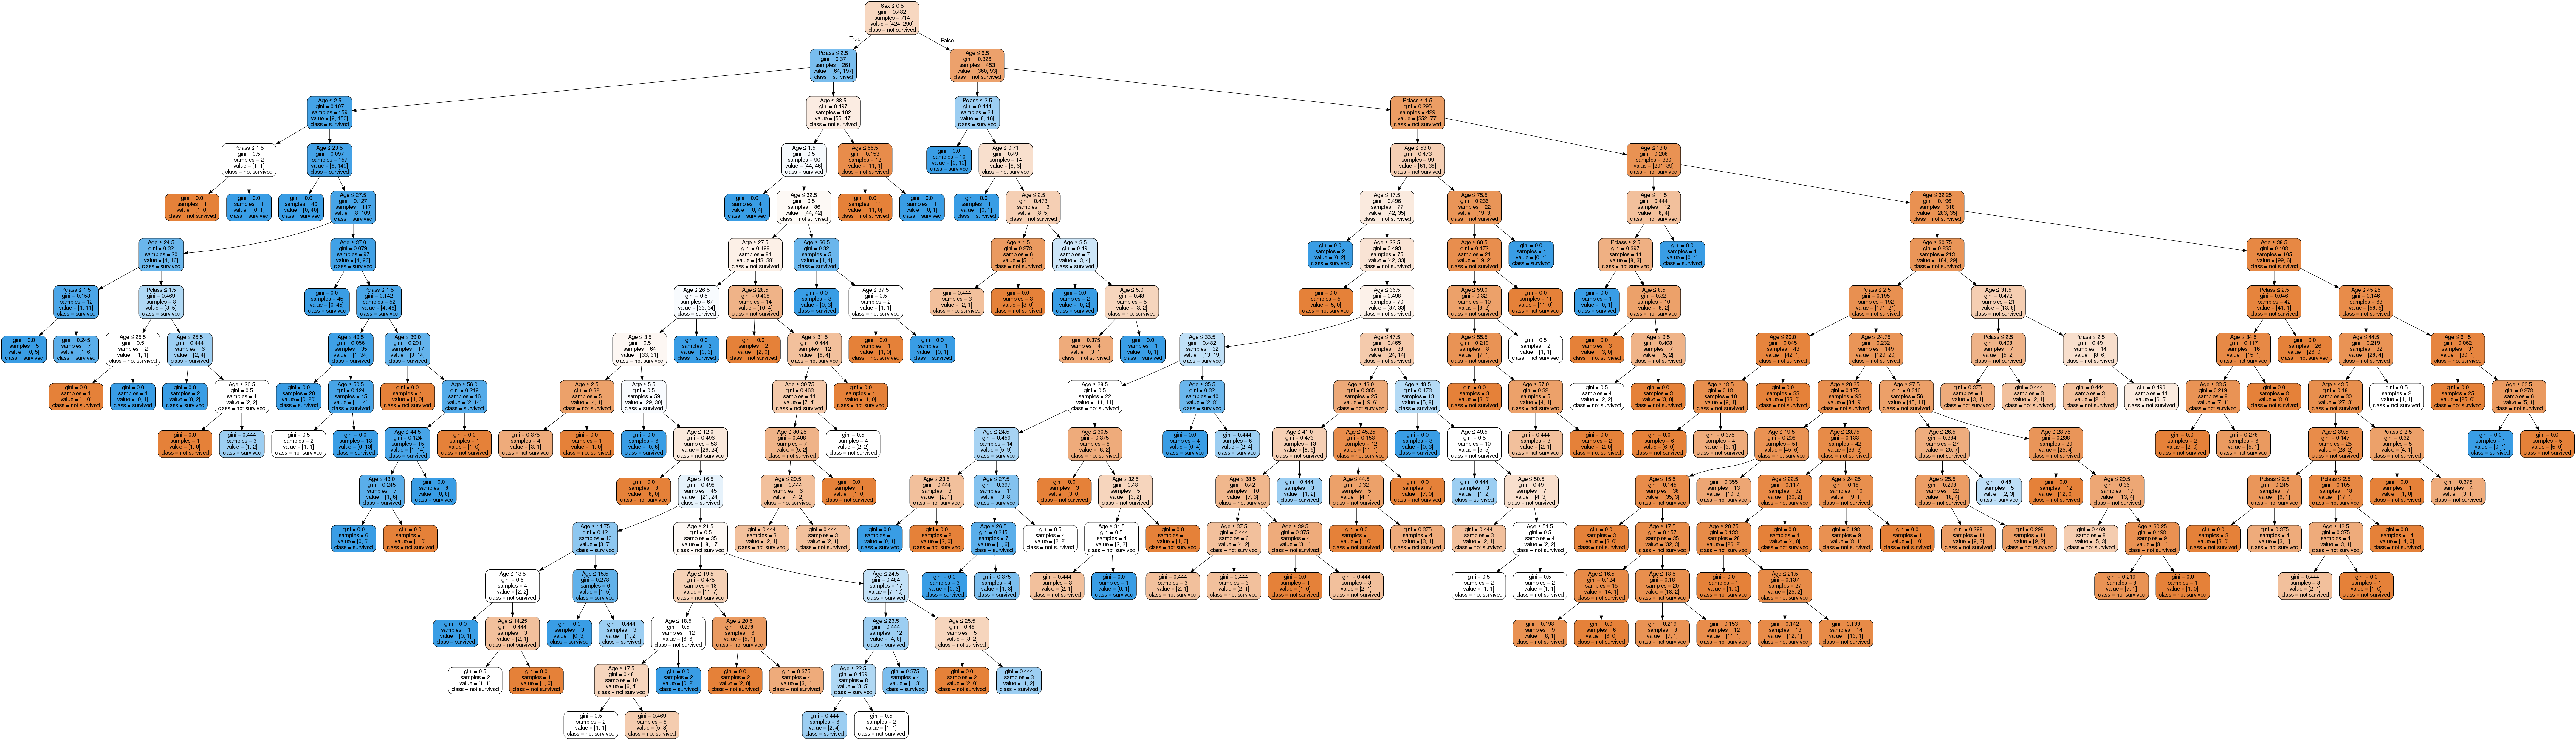

In [11]:
dot_data=tree.export_graphviz(dtc,out_file=None
                              ,feature_names=features
                              ,filled=True,rounded=True,special_characters=True
                             ,class_names=["not survived", "survived"]# Se voglio vedere la classe di riferimento
                             )
graph= pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=123)

In [32]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
pred=dtc.predict(x_test)

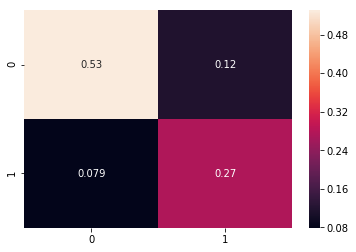

In [35]:
sns.heatmap(confusion_matrix(pred,y_test)/pred.size,annot=True)

In [36]:
print(classification_report(pred,y_test))

             precision    recall  f1-score   support

          0       0.87      0.82      0.84       139
          1       0.70      0.78      0.74        76

avg / total       0.81      0.80      0.81       215

